In [13]:
import numpy as np
import vaex as vx
import pylab
#ds = vx.open("/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5")
server = vx.server("localhost")
ds = server.open("Aq-A-2-999-shuffled-10percent")
%matplotlib inline

fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/info


Simplest example
=========
The default for plot is to calculate the mean +/- 3 sigma for the limits, and plot the density plot

fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/histogram
data (256, 256) [[  6.   6.   7. ...,  11.  15.   7.]
 [  5.   9.  29. ...,   4.   3.  10.]
 [ 14.  31.   8. ...,   4.   3.   7.]
 ..., 
 [  0.   0.   0. ...,   2.   1.   1.]
 [  0.   0.   0. ...,   0.   0.   0.]
 [  0.   0.   1. ...,   0.   0.   1.]]


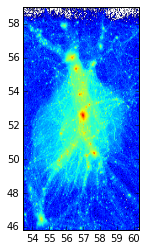

In [14]:
subspace = ds("x", "y")
subspace.plot(f=np.log)

More control
============
For more control, you can find the limits yourself, with minmax or limits_sigma, do the histogram, and let vaex handle the plotting.

Vaex uses matplotlib, so any matplotlib routines before and afterwards are fine.

In [15]:
limits = subspace.limits_sigma(square=True, sigmas=0.4)
means = subspace.mean()
print "limits", limits

limits [[ 56.19687274  57.5339734 ]
 [ 51.748527    53.08562765]]


In [16]:
grid = subspace.histogram(size=256, limits=limits)

fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/histogram
data (256, 256) [[  4.   7.   4. ...,   4.   1.   3.]
 [  8.   5.   2. ...,   2.   7.   1.]
 [  1.   5.   4. ...,   5.   3.   6.]
 ..., 
 [  2.   2.   1. ...,   6.   9.   8.]
 [  1.   2.   3. ...,  14.  10.  12.]
 [  1.   3.   1. ...,   9.   7.  17.]]


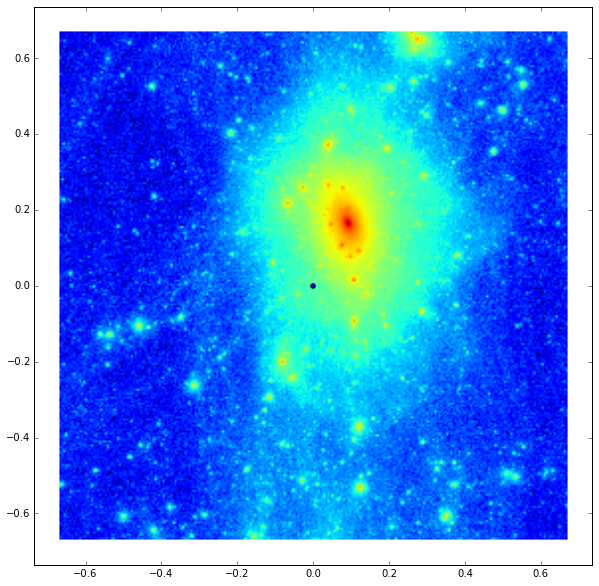

In [17]:
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log10(grid+1), limits, center=means)
pylab.scatter(0, 0)

More control
======
Extra keywords will be passed to pylab.imshow, such as cmap for the colormap

fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/histogram
data (512, 512) [[ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  2.  0.  0.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


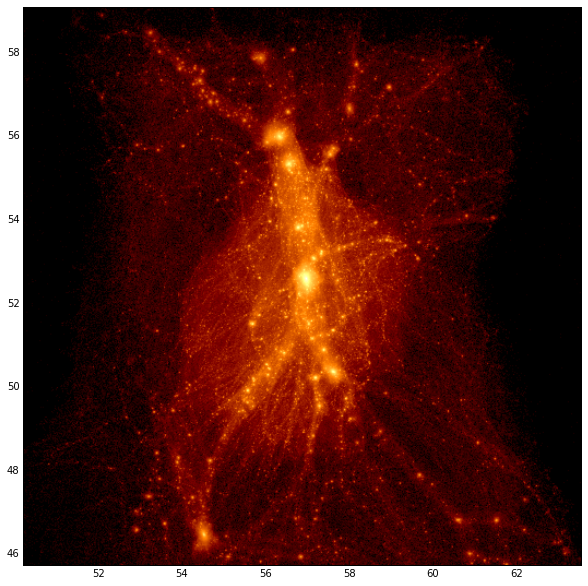

In [18]:
limits = subspace.limits_sigma(sigmas=4, square=True)
grid = subspace.histogram(size=512, limits=limits)
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(grid, limits=limits, f=np.log1p, cmap='afmhot')

In [19]:
#reload_ext autoreload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Selections
==========
Selections can be done using expressions as well. To use the selection, use subspace.selected()

In [20]:
ds.select("(z<48)")
selected = subspace.selected()
grid_masked1 = selected.histogram(size=512, limits=limits)
ds.select("(z>50)")
grid_masked2 = selected.histogram(size=512, limits=limits)


fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/histogram
data (512, 512) [[ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  0. ...,  2.  3.  1.]
 [ 0.  0.  0. ...,  2.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
fetching http://localhost:5000/datasets/Aq-A-2-999-shuffled-10percent/histogram
data (512, 512) [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


/Users/maartenbreddels/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log
/Users/maartenbreddels/.local/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


<matplotlib.contour.QuadContourSet instance at 0x10f6f31b8>

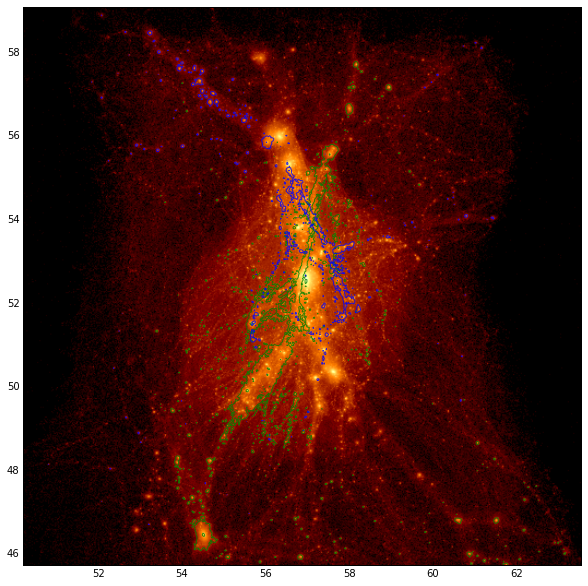

In [21]:
cmap = 'afmhot'
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log(grid+1), limits=limits, cmap=cmap, alpha=1.0)
#subspace.plot(np.log(grid_masked), limits=limits, cmap=cmap, alpha=0.5)
pylab.contour(np.log(grid_masked1), 2, extent=np.array(limits).flatten(), alpha=0.8, colors="green")
pylab.contour(np.log(grid_masked2), 2, linewidth="2pt", colors="blue", extent=np.array(limits).flatten(), alpha=0.8)

In [22]:
subspace = ds("x", "y")

In [12]:
subspace.mean()

array([ 56.86512294,  52.41711999])